## Predicting heart disease using machine learning

The goal of this notebook is to develop a machine learning model that can determine whether or not a person has heart disease based on their medical characteristics. It explores several Python-based machine learning and data science libraries to do this.

we are going to take the following approach:

1. Problem definition
2. Data
3. Evalaution
4. Features
5. Modelling
6. Experimentation


## 1.Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?



## 2.Data

The orignal data came from the Cleaveland data from the UCI Machine Learning Repository.
https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> If we can reach 96% accuracy at  predicting whether or not a patient has heart disease during the proof of concept, we will persue the project.

## 4. Features

This is where you will find different information about each of the featurs in the  data.





#### Create data Dictionary

##### There are 13 attributes

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7. restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes; 0 = no)

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment

-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label

14. condition: 0 = no disease, 1 = disease

# Preparing the tools

> The following Libraries been used for this project:

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier





In [130]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc



## Load data

In [6]:
df = pd.read_csv("heart-disease (1).csv")

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.shape

(303, 14)



## Data Explopration

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
# find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

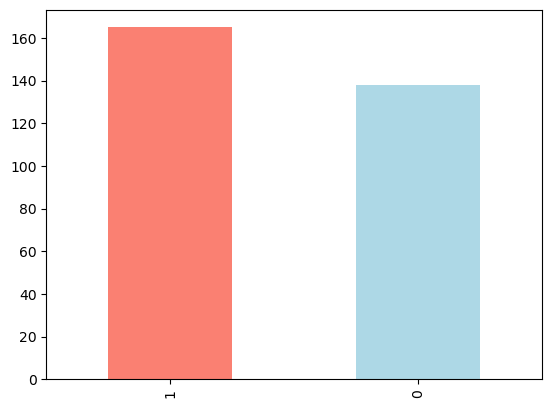

In [15]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000




### Heart Disease Frequency according to Sex

In [20]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
### Comparing target and sex columns
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


> Based in our recent Data 73% of women in this data has a heart Disease and 55% of male in this Data has a heart Disease

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

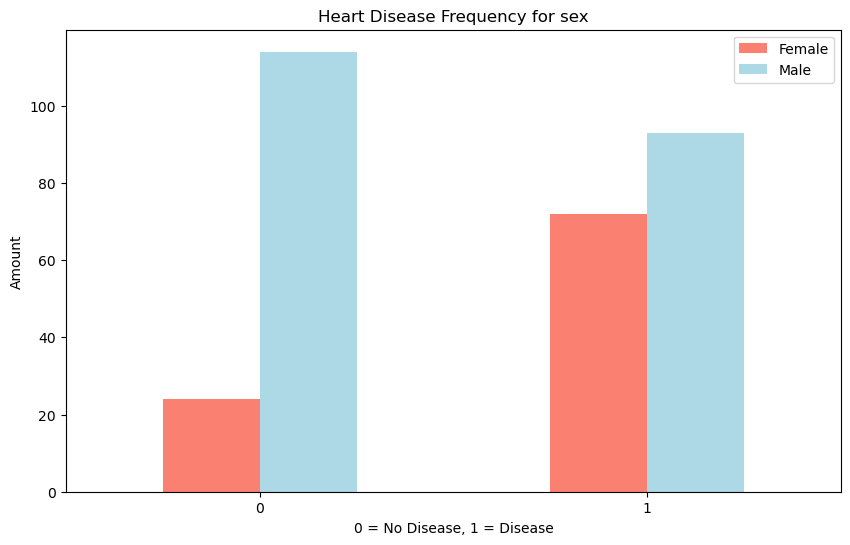

In [26]:
# Plot of crosstab

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), 
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0)

## Age vs Max Heart Rate for heart Disease




In [28]:
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

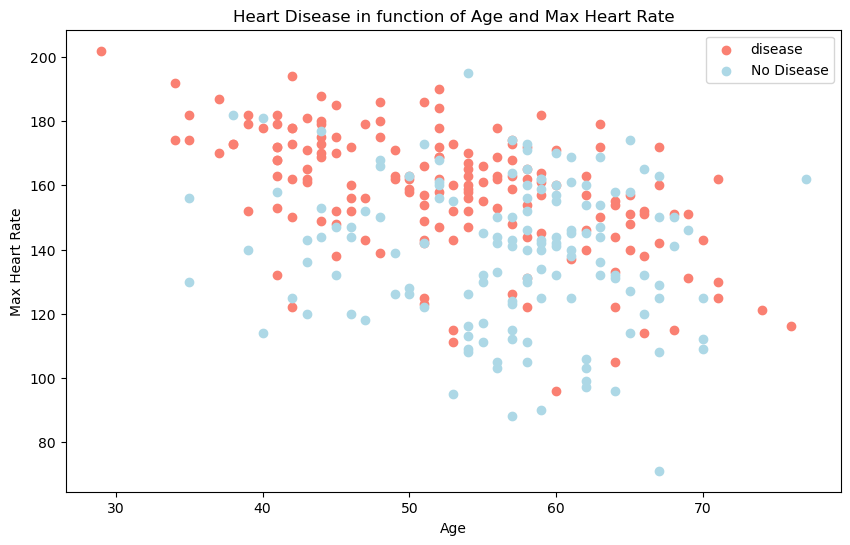

In [35]:
# Creating another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
                    c="lightblue");


# Some extra info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["disease", "No Disease"]);


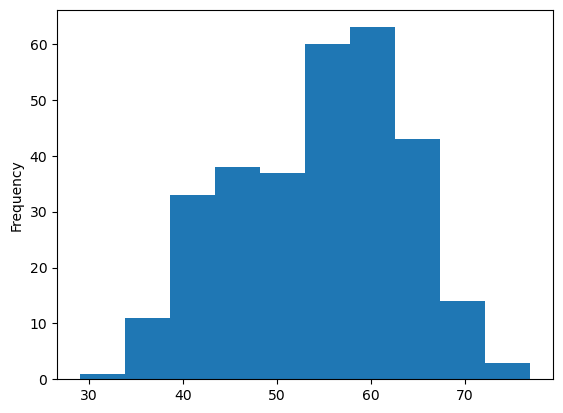

In [36]:




# the distribution of the age column with a histogram
df.age.plot.hist();

## Heart diseas frequency for chest pain Type

cp: chest pain type

* -- Value 0: typical angina 
* -- Value 1: atypical angina 
* -- Value 2: non-anginal pain -- 
* -- Value 3: asymptomatic



In [37]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


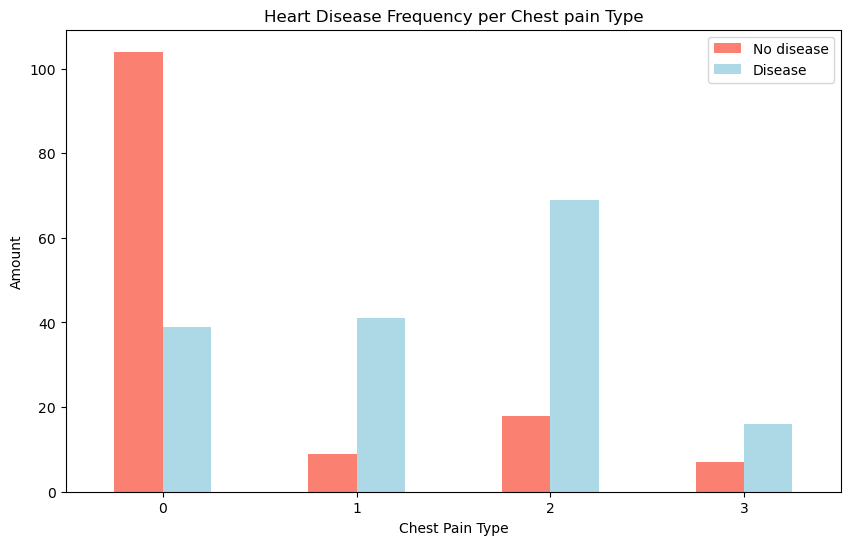

In [41]:
# Crosstab visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10, 6),
                                  color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency per Chest pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);


In [42]:
# make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


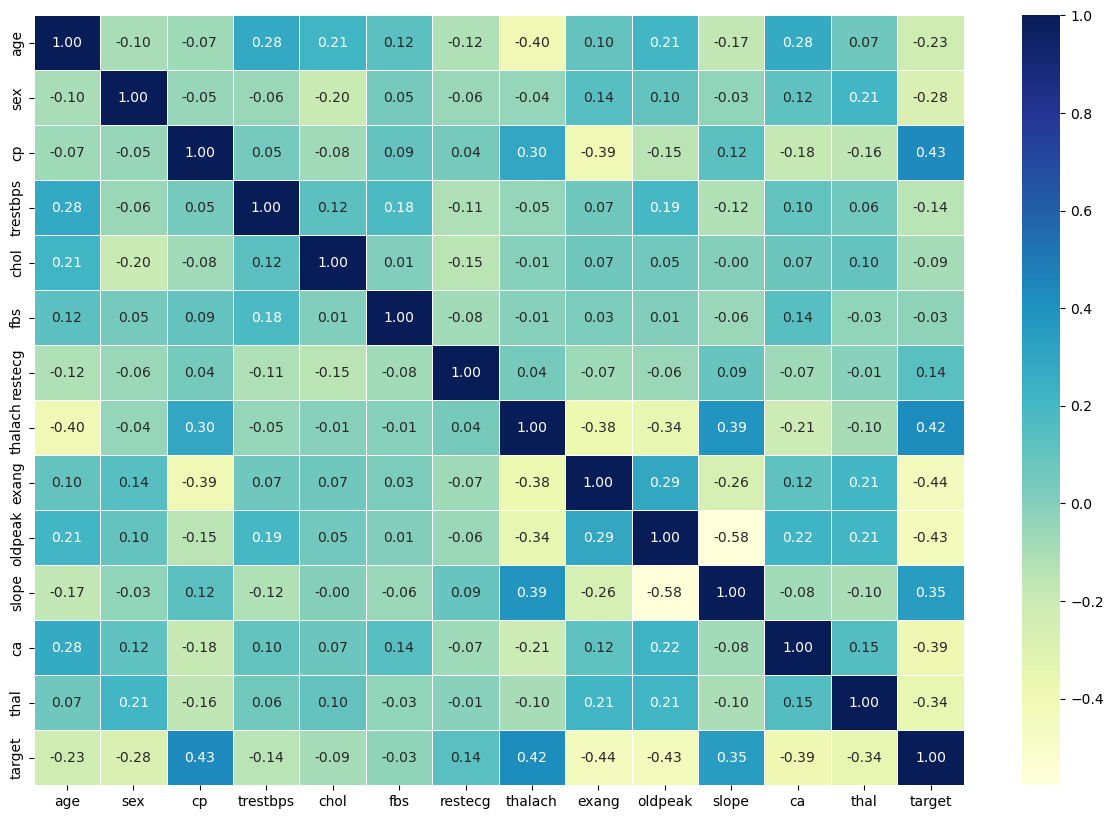

In [44]:


corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Machine Learing and Modelling


### split Data into X and Y

In [46]:
x = df.drop("target", axis=1)

y = df["target"]

In [47]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
# split data into train and test sets

In [57]:
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
                                                   

In [58]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [60]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### After spliting our data into training and test sets, Now to build a machine learning model.

1. We will train it (find the patterns) on the training set.

2. we will test it (use the patterns) on the test set.


## Using three different machien learning models:

1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest classifier

In [67]:
# put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluates given machine Learning models.
    models : a dict of different scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : traing labels
    y_test : test labels
    """
    
    # set random seed
    np.random.seed(42)
    
    #make a list to keep model scores
    model_scores={}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores

model_scores = fit_and_score(models = models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test )

print(model_scores)


{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


C:\Users\ZaZa\Desktop\Data_science\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


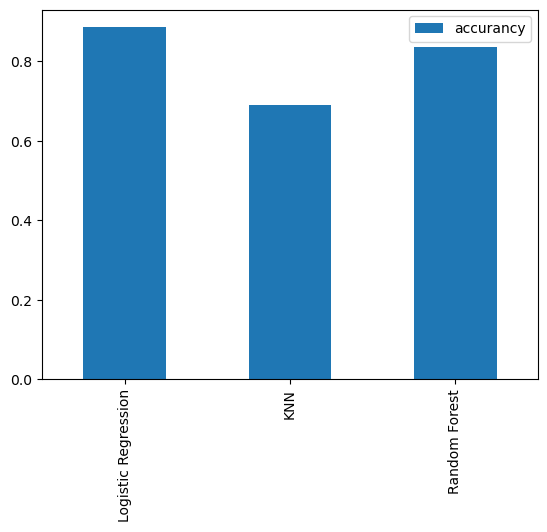

In [68]:
model_compare = pd.DataFrame(model_scores, index=["accurancy"])
model_compare.T.plot.bar();

> Logistic Regression shows more promising Acurrancy compare to Random forest and KNN

### Now we will tune our model even more and look into following:
    * Hyperterparameter tuning
    * Feature importance
    * Confusion matrix
    * Cross-validation
    * Precision
    * Recall
    * F1 score
    * Classification report
    * ROC curve
    * Area Under the curve (AUC)

## Hyperparameter tuning

In [76]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn= KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))




In [77]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [78]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximim KNN score on the test data: 75.41%


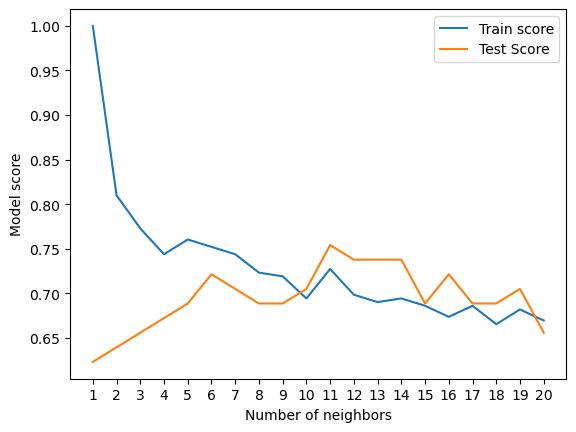

In [79]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximim KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with Randomized SearchCv

#### Tuning the following parameters:
* Logistic Regression()
* RandomForestClassifier()



In [101]:
# Create a hyperparameter grid for the Logistic Regression
log_reg_grid = {"C": np.logspace (-4, 4, 20), 
               "solver": ["liblinear"]}

# Create a hyperparam,eter grid for Random Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

##### Got hyperparamter grids setup for each of my models and now I will tune them using RandomizedSearchCV.

In [102]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparamter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
param_distributions=log_reg_grid,
cv=5,
n_iter=20,
verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [103]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [104]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

> We did beat out Logistic Regression model previous score, as it is still the same 

### Tuning RandomForestClassifier

In [105]:
# Set up random seed
np.random.seed(42)

# Setup random hyperparamter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
param_distributions=rf_grid,
cv=5,
n_iter=20,
verbose=True)

# Fit random hyperparameter search model for Logistic Regression
rs_rf.fit(x_train, y_train)

  
 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [107]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [108]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

> Random Forest Classifier model score better than before but still lower than Logistic Regression therefore we will go with the Logistic Regression model.

## Using grid search Cv to tune hyperparamter 
1. Logitistic Regression model provide the best scores therefore we will improve the it with Grid Search CV

In [123]:
# Create a hyperparameter grid for the Logistic Regression
log_reg_grid = {"C": np.logspace (-4, 4, 30), 
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [124]:
# checking for the best hyperparamters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [125]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## Evalution the tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [126]:
# Predicting with tuned model
y_preds = gs_log_reg.predict(x_test)


In [127]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [128]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)
    y_probs = y_probs[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label='ROC (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



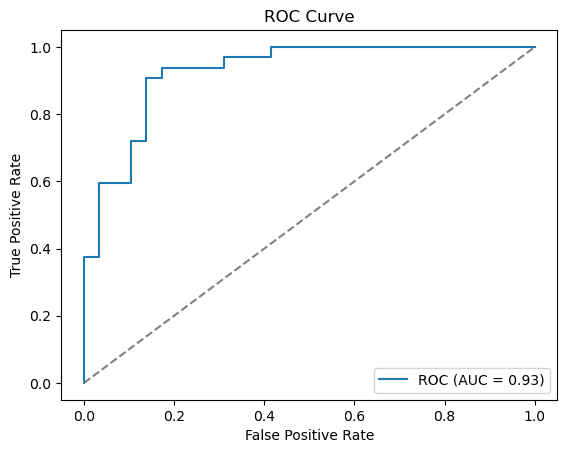

In [139]:
plot_roc_curve(gs_log_reg, x_test, y_test)


## Confusion matrix

In [140]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


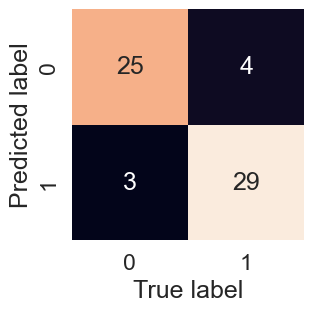

In [146]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Ploting a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

    

In [147]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evalution metric using cross validation

I will calculate precision, recall and f1 score of my model using cross-validation

In [148]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [152]:
# Creating new classifier with the best parameters
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")


In [155]:
# Cross validation accuracy
cv_acc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [156]:
cv_acc = np.mean(cv_acc) 

In [157]:
cv_acc

0.8446994535519124

In [160]:
# Cross validation precision
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision_macro")
cv_precision = np.mean(cv_precision)
print("Mean cross-validated precision: {:.2f}%".format(cv_precision ))

Mean cross-validated precision: 0.85%


In [161]:
# cross-validation recall
cv_recall= cross_val_score(clf,
                          x,
                          y,
                          scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [162]:
# cross- validation f1-score
cv_f1= cross_val_score(clf,
                          x,
                          y,
                          scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

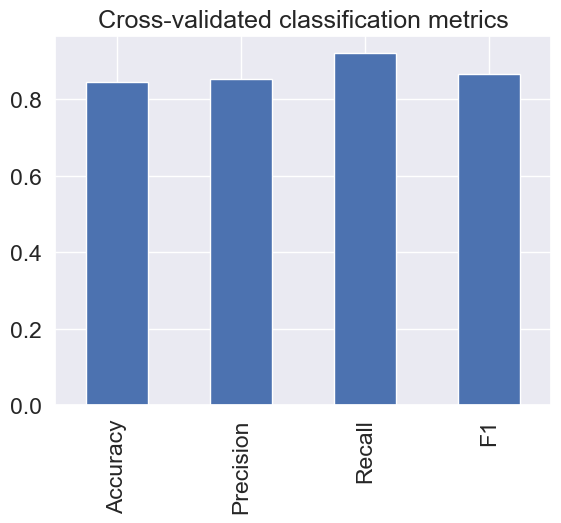

In [165]:
# visualize cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1": cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

### Feature importance

which features contributes most to the outcomes of the model 

In [166]:
# Fit an instance of logistic regression
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(x_train, y_train);

In [167]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [168]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

## visualize feature importance

<AxesSubplot: title={'center': 'Feature Importance'}>

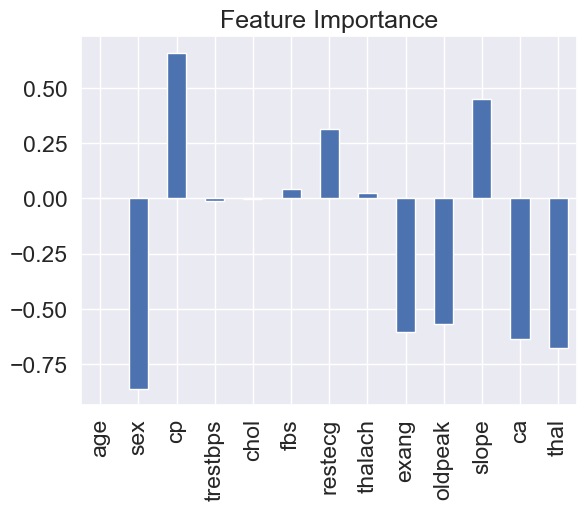

In [171]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

> at the end of this machine Learning training, we only able to reach 88% accuracy and might try different parameters and more Data in order to reach the 96% accuracy